<a href="https://colab.research.google.com/github/JeongsupMoon/BioInfo1_term_proj/blob/main/CoLab_TermProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.tmux.conf
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.bashrc.biolab
./root/.vimrc
./root/.profile
--2021-05-10 05:56:28--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  89.87M   267MB/s    in 0.3s    

2021-05-10 05:56:29 (267 MB/s) - ‘miniconda3.sh’ save

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## Google Drive에 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. 1G씩 끊어지지만 자동으로 이어받아집니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

--2021-05-10 06:24:51--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 6424668160 (6.0G) [application/octet-stream]
Saving to: ‘STDOUT’

-                    16%[==>                 ]   1.01G  3.62MB/s    in 5m 9s   

2021-05-10 06:30:01 (3.34 MB/s) - Connection closed at byte 1082293973. Retrying.

--2021-05-10 06:30:02--  (try: 2)  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 206 Partial Content
Length: 6424668160 (6.0G), 5342374187 (5.0G) remaining [application/octet-stream]
Saving to: ‘STDOUT’

-                    17%[+++                 ]   1.03G  1.91MB

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [2]:
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
f691d94ca9c72e6feedbfe4561dd5b83  drive/MyDrive/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  drive/MyDrive/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  drive/MyDrive/binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  drive/MyDrive/binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  drive/MyDrive/binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29b

그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

--2021-05-10 06:55:00--  http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28359457 (27M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz’

/content/drive/MyDr 100%[===================>]  27.04M   806KB/s    in 36s     

2021-05-10 06:55:37 (772 KB/s) - ‘/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz’ saved [28359457/28359457]



다루기 쉽도록 Annotation 압축을 풉니다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

In [ ]:
!ls -al drive/MyDrive/binfo*

total 7136706
-rw------- 1 root root 1370036258 May  6 08:22 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 08:23 CLIP-35L33G.bam.bai
-rw------- 1 root root  883334756 May  5 14:04 gencode.gtf
-rw------- 1 root root 1003658801 May  6 08:38 RNA-control.bam
-rw------- 1 root root    2276104 May  6 08:39 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 08:47 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May  6 08:47 RNA-siLin28a.bam.bai
-rw------- 1 root root  981684502 May  6 08:59 RNA-siLuc.bam
-rw------- 1 root root    2606104 May  6 08:59 RNA-siLuc.bam.bai
-rw------- 1 root root  737352902 May  6 09:04 RPF-siLin28a.bam
-rw------- 1 root root    2482768 May  6 09:05 RPF-siLin28a.bam.bai
-rw------- 1 root root 1055123479 May  6 09:02 RPF-siLuc.bam
-rw------- 1 root root    2605912 May  6 09:02 RPF-siLuc.bam.bai


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y subread

Solving environment: \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h5bf99c6_1        22.8 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.8 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h5bf99c6_1



subread-2.0.1        | 22.8 MB   | : 100% 1.0/1 [00:04<00:00,  4.19s/it]               
Preparing transaction: / done
Verifying transaction: \ | 

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [3]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로 읽어와 봅니다.

In [4]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [5]:
cnts.drop(cnts.index[cnts['RNA-control.bam'] < 1000], inplace = True)
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / (cnts['RNA-control.bam'])
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000043716.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,16171519;16171519;16171530;16171752;16171951;1...,16171583;16171583;16172160;16172823;16172160;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2687,3379,4658,5150,4031,1838,3180,0.725419,0.452401
ENSMUSG00000041859.11,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,20873192;20873197;20873230;20873389;20874910;2...,20873878;20873878;20873945;20873878;20875131;2...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3752,3066,5331,12838,10731,1431,3846,0.575127,0.311009
ENSMUSG00000101111.2,chr1,24652270,24653052,-,783,435,4793,21077,15267,18350,15191,0.090757,0.874973
ENSMUSG00000100862.2,chr1,24653055,24653732,-,678,397,4400,13110,11727,12213,9753,0.090227,1.120130


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


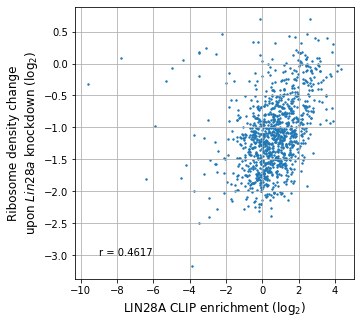

In [7]:
from matplotlib import pyplot as plt
import numpy as np

x = np.array(np.log2(cnts['clip_enrichment']))
y = np.array(np.log2(cnts['rden_change']))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
corr = cnts[['clip_enrichment','rden_change']].corr().iloc[0,1]
plt.grid()
ax.scatter(x, y, s = 2)
ax.text(-9, -3,"r = {:.4}".format(corr), fontsize=10)
plt.xlabel(r'LIN28A CLIP enrichment (log$_2$)',fontsize=12)
plt.ylabel('Ribosome density change\nupon $Lin28a$ knockdown (log$_2$)',fontsize=12)
plt.show()

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [11]:
cnts['gene_id']=[name[0] for name in cnts.index.str.split('.')]
new_cnts=pd.merge(cnts, mouselocal, how='left', on="gene_id").dropna()

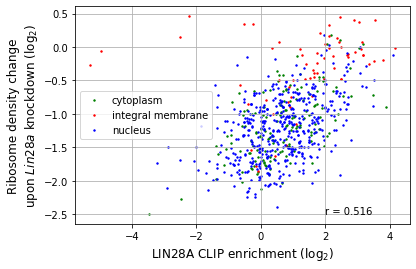

In [12]:
from matplotlib import pyplot as plt
import numpy as np

x = np.array(np.log2(new_cnts['clip_enrichment']))
y = np.array(np.log2(new_cnts['rden_change']))

cdict = {'integral membrane': 'red', 'nucleus': 'blue', 'cytoplasm': 'green'}
fig, ax = plt.subplots()
plt.grid()
for group in np.unique(new_cnts.type):
    ix = np.where(new_cnts.type == group)
    ax.scatter(x[ix], y[ix], c = cdict[group], label = group, s = 2)
ax.legend()
corr = new_cnts[['clip_enrichment','rden_change']].corr().iloc[0,1]
ax.text(2, -2.5,"r = {:.4}".format(corr), fontsize=10)
ax.legend()
plt.xlabel(r'LIN28A CLIP enrichment (log$_2$)',fontsize=12)
plt.ylabel('Ribosome density change\nupon $Lin28a$ knockdown (log$_2$)',fontsize=12)
plt.show()
